In [1]:
# So, in Python (and R for that matter), one funny thing relative to Stata is that we need to import libraries.
# We _do_ import certain user-written commands in Stata, even at the introductory level (e.g., -ssc install 
# spineplot- is required for the Stata version of this project), but it's not strictly necessary. 

import numpy as np # loads simple numeric analysis package called "numpy", lets us invoke it with abbrev. "np"
import pandas as pd # loads sophisticated data analysis package called "pandas", lets us invoke it with abbrev. "pd"
import matplotlib.pyplot as plt # same but for a library of graphing inspired heavily by MATLAB
%matplotlib inline
    # Tells Python to plot graphs in-line. 
import seaborn as sns # same but for the Seaborn, which is a a sleeker graphing package
from IPython.display import Latex # LaTeX is a pretty useful tool to have for rendering mathematical symbols
from mpl_toolkits import mplot3d # This allows for plotting in R3.

In [2]:
# A bit more-advanced tidying...
# Let's also set Jupyter up so that all results from each cell are printed 
from IPython.core.interactiveshell import InteractiveShell # see here https://archive.ph/QJFOK
InteractiveShell.ast_node_interactivity = "all"

In [3]:
# In Python, we don't have "a" data-set but rather data objects. Let's pull the (very slightly) cleaned 
# GSS 2018 data from my GitHub. Head here https://github.com/gjmbur/SOC360fa22/blob/main/gss2018python.dta
# and then download the data and place the file in whatever folder you want. Then...

In [4]:
GSS = pd.read_stata("~/desktop/Python/data/gss2018python.dta")

/Users/gjmb/anaconda3/lib/python3.9/site-packages/pandas/io/stata.py:1514: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  warnings.warn(msg, UnicodeWarning)


In [29]:
# Let's inspect the first few lines of data to make sure that everything looks OK. 
GSS.head() # looks good
GSS.describe()

,abany,abdefect,abfelegl,abhelp1,abhelp2,abhelp3,abhelp4,abhlth,abinspay,abmedgov1,...,xmarsex,xmarsex1,xmovie,xnorcsiz,year,yearsjob,yearsusa,yearval,yousup,zodiac
0,no,yes,NaN,yes,yes,yes,yes,yes,people should be able,the government should decide,...,always wrong,always wrong,NaN,"uninc,med city",2018,1.0,NaN,NaN,45.0,virgo
1,yes,yes,it depends,no,no,no,no,yes,people should not be able,NaN,...,always wrong,NaN,no,"uninc,med city",2018,NaN,NaN,NaN,NaN,aquarius
2,NaN,NaN,NaN,yes,no,yes,yes,NaN,people should not be able,a woman and her medical professional should de...,...,NaN,always wrong,no,"uninc,med city",2018,15.0,NaN,NaN,3.0,aries
3,NaN,NaN,should,yes,yes,yes,yes,NaN,people should be able,NaN,...,NaN,NaN,no,"uninc,med city",2018,25.0,NaN,NaN,10.0,aries
4,no,yes,NaN,no,no,no,yes,yes,people should not be able,NaN,...,always wrong,NaN,no,"uninc,med city",2018,NaN,NaN,NaN,NaN,cancer


,formwt,id,oversamp,version,year
count,2348.0,2348.000000,2348.0,2348.000000,2348.0
mean,1.0,1174.500000,1.0,2.001704,2018.0
std,0.0,677.953538,0.0,0.818926,0.0
min,1.0,1.000000,1.0,1.000000,2018.0
25%,1.0,587.750000,1.0,1.000000,2018.0
50%,1.0,1174.500000,1.0,2.000000,2018.0
75%,1.0,1761.250000,1.0,3.000000,2018.0
max,1.0,2348.000000,1.0,3.000000,2018.0


In [30]:
# Let's get some basic info about our variables. Notably, these are both categories.
GSS[['educ', 'paeduc']].info() 
    # Note that the double brackets are necessary: the single brackets tell Python to expect a column name
    # and the second pair of brackets tells it to expect a tuple or list of columns. 
GSS[['educ', 'paeduc']].describe() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2348 entries, 0 to 2347
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   educ    2345 non-null   category
 1   paeduc  1687 non-null   category
dtypes: category(2)
memory usage: 24.3 KB


,educ,paeduc
count,2345.0,1687.0
unique,21.0,21.0
top,12.0,12.0
freq,657.0,596.0


In [54]:
# There are several ways to get these pesky incorrect data-types corrected. Here's one simple one, 
# given by page 176 of VanderPlas (many methods you'll find on Google are more complex).
GSS['educ'] = GSS['educ'].dropna() # We need to drop missing values first
GSS['educ'] = GSS['educ'].astype(float) # Then convert to a float
GSS['educ'].describe()
GSS['paeduc'] = GSS['paeduc'].dropna() 
GSS['paeduc'] = GSS['paeduc'].astype(float)
GSS = GSS.dropna(subset=['educ', 'paeduc'])
GSS.describe()

count    2345.000000
mean       13.731770
std         2.974313
min         0.000000
25%        12.000000
50%        14.000000
75%        16.000000
max        20.000000
Name: educ, dtype: float64

,educ,formwt,id,oversamp,paeduc,version,year
count,1687.000000,1687.0,1687.000000,1687.0,1687.000000,1687.000000,1687.0
mean,14.123296,1.0,1174.059277,1.0,11.883225,2.005928,2018.0
std,2.917444,0.0,680.731570,0.0,4.147774,0.818651,0.0
min,0.000000,1.0,1.000000,1.0,0.000000,1.000000,2018.0
25%,12.000000,1.0,568.500000,1.0,10.000000,1.000000,2018.0
50%,14.000000,1.0,1171.000000,1.0,12.000000,2.000000,2018.0
75%,16.000000,1.0,1771.500000,1.0,14.000000,3.000000,2018.0
max,20.000000,1.0,2348.000000,1.0,20.000000,3.000000,2018.0


In [8]:
# We could also convert these to ints using the factorize function. This (https://archive.ph/UYD1j) provides a nice
# guide. The syntax is that we tell Python to replace the columns "educ" and "paeduc" with those same columns,
# to which we apply an anonymous function which factorizes the data (this discussion goes into a bit of the
# logic for why we append "[0]": it "throws away the 'uniques'", basically: https://archive.ph/gx2Iq). 

GSSalt = pd.read_stata("~/desktop/Python/data/gss2018python.dta")

# Let's first just drop missing values for convenience, by the way.
GSSalt = GSSalt.dropna(subset=['educ', 'paeduc'])
GSSalt[['educ', 'paeduc']] = GSSalt[['educ', 'paeduc']].apply(lambda anyoldinput: pd.factorize(anyoldinput)[0])
    # Incidentally, this dicussion provides some other options: https://archive.ph/FtcEx.

# We can quickly check our results.
GSSalt[['educ','paeduc']].info()

/Users/gjmb/anaconda3/lib/python3.9/site-packages/pandas/io/stata.py:1514: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  warnings.warn(msg, UnicodeWarning)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1687 entries, 0 to 2347
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   educ    1687 non-null   int64
 1   paeduc  1687 non-null   int64
dtypes: int64(2)
memory usage: 39.5 KB


In [31]:
# We can now take a more-detailed look at our two variables of interest. 
GSS[['educ', 'paeduc']].describe()

,educ,paeduc
count,2345.0,1687.0
unique,21.0,21.0
top,12.0,12.0
freq,657.0,596.0


Text(0.5, 1.0, 'Distribution of education')

Text(0.5, 0, 'years')

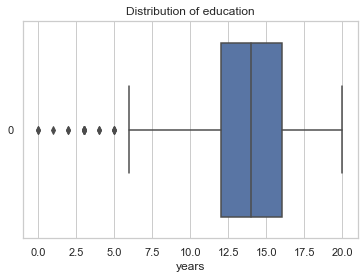

In [40]:
sns.set_theme(style='whitegrid')
ax = sns.boxplot(data=GSS['educ'], orient='h')
ax.set_title('Distribution of education')
ax.set_xlabel('years')

Text(0.5, 1.0, 'Distribution of education in the US')

Text(0, 0.5, 'Years')

[Text(0, 0, "Respondent's education"), Text(1, 0, "Father's education")]

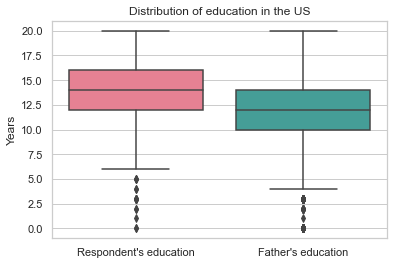

In [44]:
fig2 = sns.boxplot(data=GSS[['educ', 'paeduc']], palette="husl")
fig2.set_title("Distribution of education in the US")
fig2.set_ylabel("Years")
fig2.set_xticklabels(["Respondent's education","Father's education"])

Text(0.5, 1.05, "Relationship between individuals' education and that of their fathers")

Text(0.5, 1.05, "Relationship between individuals' education and that of their fathers")

Text(0.5, 30.49999999999995, "Individual's education")

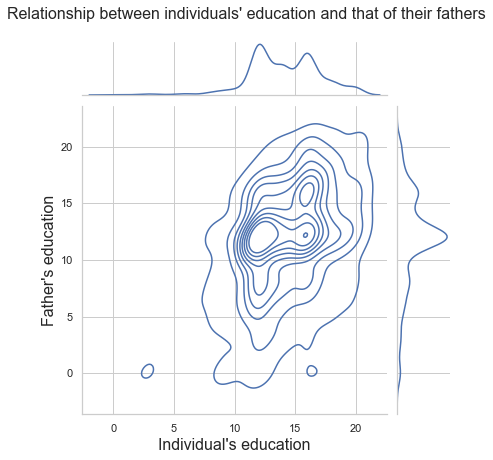

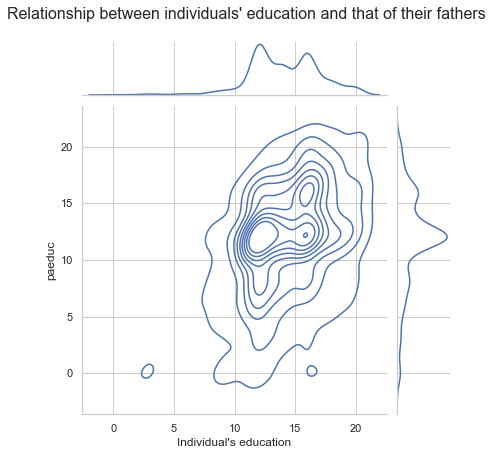

In [45]:
g = sns.jointplot(data=GSS, x='educ', y='paeduc', kind='kde')
title = "Relationship between individuals' education and that of their fathers"
plt.suptitle(title, y=1.05, fontsize=16)
    # https://archive.ph/00C7x for the difficulties on titles and jointplots
g.set_axis_labels("Individual's education", "Father's education", fontsize=16)
    # https://archive.ph/GWTv1 this is a convenience method
    # jointplot also returns a jointgrid object, which gives you access to axes that way.
G = sns.jointplot(data=GSS, x='educ', y='paeduc', kind='kde')
plt.suptitle(title, y=1.05, fontsize=16)
G.ax_joint.set_xlabel("Individual's education")

,educ,jeduc,paeduc,jpaeduc
0,14.0,13.952319,12.0,13.498667
1,10.0,9.952319,0.0,1.498667
2,16.0,15.952319,12.0,13.498667
3,16.0,15.952319,16.0,17.498667
4,18.0,17.952319,12.0,13.498667
5,16.0,15.952319,12.0,13.498667
8,8.0,7.952319,12.0,13.498667
9,12.0,11.952319,6.0,7.498667
10,19.0,18.952319,12.0,13.498667
13,16.0,15.952319,16.0,17.498667


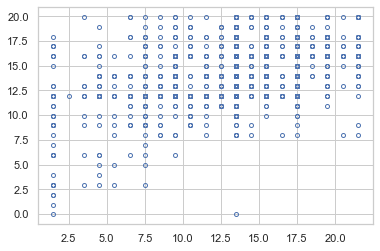

In [46]:
GSS['jeduc'] = GSS['educ']+np.random.uniform(-2, 2)
GSS['jpaeduc'] = GSS['paeduc']+np.random.uniform(-2, 2)
GSS[['educ', 'jeduc', 'paeduc', 'jpaeduc']].head(20)
scttr1 = plt.plot('jpaeduc', 'jeduc', 'o', data=GSS, markersize=4, markerfacecolor='none')

Text(0.5, 0, "Father's education")

Text(0, 0.5, "Respondent's education")

Text(0.5, 1.0, "Relationship between individuals' education and that of their fathers")

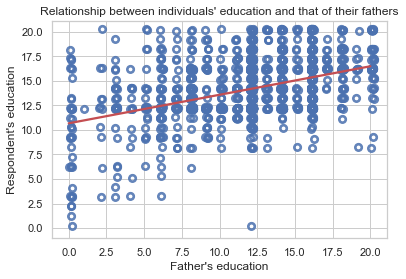

In [47]:
# Essential documentation: https://archive.ph/QoRNq. 
sns.set_style('whitegrid')
ax = sns.regplot(x='paeduc', y='educ', data = GSS, x_jitter=0.1, y_jitter=0.1,
                marker = '$\circ$', ci=None, 
                scatter_kws={"s": 150},
                line_kws={"color": "r", })
ax.set_xlabel("Father's education")
ax.set_ylabel("Respondent's education")
ax.set_title("Relationship between individuals' education and that of their fathers")

Text(0.5, 1.0, 'Distribution of education by race in the US')

Text(0, 0.5, 'Years')

Text(0.5, 0, '')

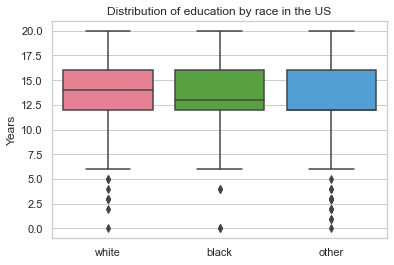

In [14]:
fig3 = sns.boxplot(x=GSS['race'], y=GSS['educ'], palette="husl")
fig3.set_title("Distribution of education by race in the US")
fig3.set_ylabel("Years")
fig3.set_xlabel("")

In [14]:
# Now let's look at a case of two qualitative variables. 
GSS['relig'].value_counts(normalize='true') # "normalize" divides these by thee total to yield percenteages
GSS['cappun'].value_counts(normalize='true')

protestant                 0.485663
none                       0.223417
catholic                   0.221027
jewish                     0.020311
other                      0.015532
christian                  0.010753
moslem/islam               0.007766
buddhism                   0.007168
hinduism                   0.004779
orthodox-christian         0.001792
other eastern              0.000597
native american            0.000597
inter-nondenominational    0.000597
Name: relig, dtype: float64

favor     0.634069
oppose    0.365931
Name: cappun, dtype: float64

In [55]:
# Let's get dummies for cappun
religindic = pd.get_dummies(GSS['relig'])
religindic.head(10)
GSS = pd.concat([GSS, religindic['protestant']], axis=1)
GSS[['relig', 'protestant']].head()

,protestant,catholic,jewish,none,other,buddhism,hinduism,other eastern,moslem/islam,orthodox-christian,christian,native american,inter-nondenominational
0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,1,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,0,0,0
10,0,1,0,0,0,0,0,0,0,0,0,0,0
13,0,1,0,0,0,0,0,0,0,0,0,0,0


,abany,abdefect,abfelegl,abhelp1,abhelp2,abhelp3,abhelp4,abhlth,abinspay,abmedgov1,...,xmarsex1,xmovie,xnorcsiz,year,yearsjob,yearsusa,yearval,yousup,zodiac,protestant
0,no,yes,NaN,yes,yes,yes,yes,yes,people should be able,the government should decide,...,always wrong,NaN,"uninc,med city",2018,1.0,NaN,NaN,45.0,virgo,0
1,yes,yes,it depends,no,no,no,no,yes,people should not be able,NaN,...,NaN,no,"uninc,med city",2018,NaN,NaN,NaN,NaN,aquarius,0
2,NaN,NaN,NaN,yes,no,yes,yes,NaN,people should not be able,a woman and her medical professional should de...,...,always wrong,no,"uninc,med city",2018,15.0,NaN,NaN,3.0,aries,0
3,NaN,NaN,should,yes,yes,yes,yes,NaN,people should be able,NaN,...,NaN,no,"uninc,med city",2018,25.0,NaN,NaN,10.0,aries,1
4,no,yes,NaN,no,no,no,yes,yes,people should not be able,NaN,...,NaN,no,"uninc,med city",2018,NaN,NaN,NaN,NaN,cancer,0


In [58]:
# We can create a basic two-way table (also called a contingency table or, here, "crosstab").
pd.crosstab(GSS['protestant'], GSS['cappun'], normalize='index', margins=True).round(2)
    # The first argument is the rows; the second is the columns. 
    # Normalize='index' tells Python to divide by the totals of each row (called an "index" here)
    # finally, margins=True adds in the margins and "round" gives the numbers to two places

cappun,favor,oppose
protestant,,
0,0.60,0.40
1,0.67,0.33
All,0.63,0.37


(<Figure size 432x288 with 3 Axes>,
 {('0', 'favor'): (0.0, 0.0, 0.5166596041872656, 0.5994598805924359),
  ('0', 'oppose'): (0.0,
   0.6027821397286485,
   0.5166596041872656,
   0.3972178602713514),
  ('1', 'favor'): (0.5216347285653751,
   0.0,
   0.47836527143462504,
   0.6670677793182829),
  ('1', 'oppose'): (0.5216347285653751,
   0.6703900384544954,
   0.47836527143462504,
   0.3296099615455044)})

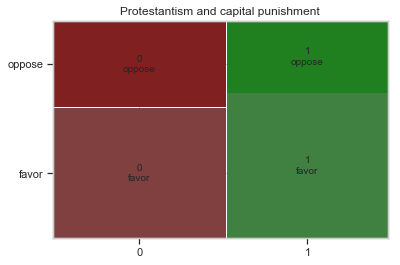

In [68]:
from statsmodels.graphics.mosaicplot import mosaic
mosaic(GSS, ['protestant', 'cappun'], title='Protestantism and capital punishment')

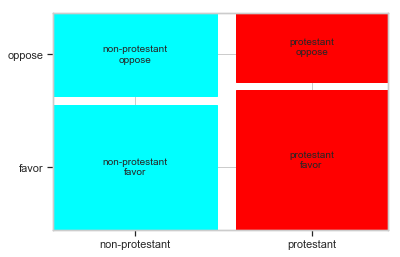

In [100]:
# modifying mosaic plots takes a bit of work...
# first, it seems easiest to get categorical versions of 'protestant'
dtype = pd.CategoricalDtype(['non-protestant', 'protestant'], ordered=False)
GSS['protestant'] = pd.Categorical.from_codes(codes=GSS['protestant'], dtype=dtype)

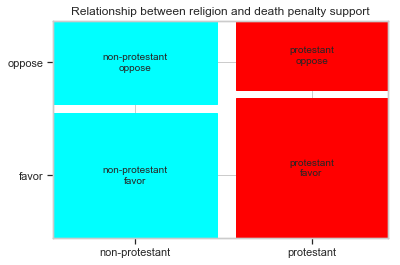

In [127]:
# next, we need to define a dictionary that we pass to "properties"
props = lambda key: {'color': 'aqua' if 'non-protestant' in key else 'red'}
    # Anonymous functions are a little tricky. They let us write a function 
    # "anonymously" if we want, i.e. without giving it a separate name. Here,
    # this lets us skip the step of defining a function that acts on "key".
ax = mosaic(GSS, ['protestant', 'cappun'], gap=0.06, properties=props,
            title="Relationship between religion and death penalty support")

In [59]:
# work in later
GSS.pivot_table('educ', index='protestant', columns='cappun', margins='true')

cappun,favor,oppose,All
protestant,,,
0,13.816162,14.545732,14.106926
1,13.866667,14.650794,14.125984
All,13.841791,14.591379,14.116088


In [ ]:
# You can also do this with the syntax of groupby, although it's a bit fussier about data-types. But there is a
# useful lesson here in constructing individual dummy variables from a polytomous variable. First, we make the
# data-frame of dummies using the "get_dummies()" command and then merge it with the old DF (there is a -merge-)
# function in Pandas, but concat is better for a simple 1:1 merge such as this. 
ddf = pd.get_dummies(GSS['degree'])
GSS = pd.concat([GSS, ddf], axis=1)
GSS['bachelor'].head() # We can now see that this has worked. 
GSS[list(ddf.columns)].head() # Now, we use the list of columns from the dummy DF. Here, I just show that they exist.
GSS.groupby(['race'])[list(ddf.columns)].mean()
    # What we do here is groupby the column race and then by the dummy variables . Then, taking the mean of the 
    # items gives the row conditional probabilities. 

In [8]:
nhanes = pd.read_stata("~/desktop/SOC360fa22/data/nhanes_merged2.dta")
nhanes.head()
varslist = list(nhanes)
varslist

,seqn,bmdstats,bmxwt,bmiwt,bmxrecum,bmirecum,bmxhead,bmihead,bmxht,bmiht,...,dxdtole,dxdtopf,from_xray,riagendr,ridageyr,wtint2yr,wtmec2yr,from_demog,_merge,agebkt
0,93703.0,1.0,13.7,3.0,89.6,NaN,NaN,NaN,88.6,NaN,...,NaN,NaN,NaN,2.0,2.0,9246.491865,8539.731348,1.0,using only (2),0-12
1,93704.0,1.0,13.9,NaN,95.0,NaN,NaN,NaN,94.2,NaN,...,NaN,NaN,NaN,1.0,2.0,37338.768343,42566.614750,1.0,using only (2),0-12
2,93705.0,1.0,79.5,NaN,NaN,NaN,NaN,NaN,158.3,NaN,...,NaN,NaN,NaN,2.0,66.0,8614.571172,8338.419786,1.0,using only (2),20-100
3,93706.0,1.0,66.3,NaN,NaN,NaN,NaN,NaN,175.7,NaN,...,48765.6,22.7,1.0,1.0,18.0,8548.632619,8723.439814,1.0,matched (3),13-19
4,93707.0,1.0,45.4,NaN,NaN,NaN,NaN,NaN,158.4,NaN,...,35224.5,19.0,1.0,1.0,13.0,6769.344567,7064.609730,1.0,matched (3),13-19


['seqn',
 'bmdstats',
 'bmxwt',
 'bmiwt',
 'bmxrecum',
 'bmirecum',
 'bmxhead',
 'bmihead',
 'bmxht',
 'bmiht',
 'bmxbmi',
 'bmxleg',
 'bmileg',
 'bmxarml',
 'bmiarml',
 'bmxarmc',
 'bmiarmc',
 'bmxwaist',
 'bmiwaist',
 'bmxhip',
 'bmihip',
 'dxdtofat',
 'dxdtole',
 'dxdtopf',
 'from_xray',
 'riagendr',
 'ridageyr',
 'wtint2yr',
 'wtmec2yr',
 'from_demog',
 '_merge',
 'agebkt']

In [11]:
nhanes['riagendr'].value_counts(normalize='true')

2.0    0.507564
1.0    0.492436
Name: riagendr, dtype: float64

Text(0.5, 0, 'Upper-arm length (cm)')

Text(0, 0.5, 'Age bracket')

Text(0.5, 1.0, "Relationship between individuals' age-group and their upper-arm length")

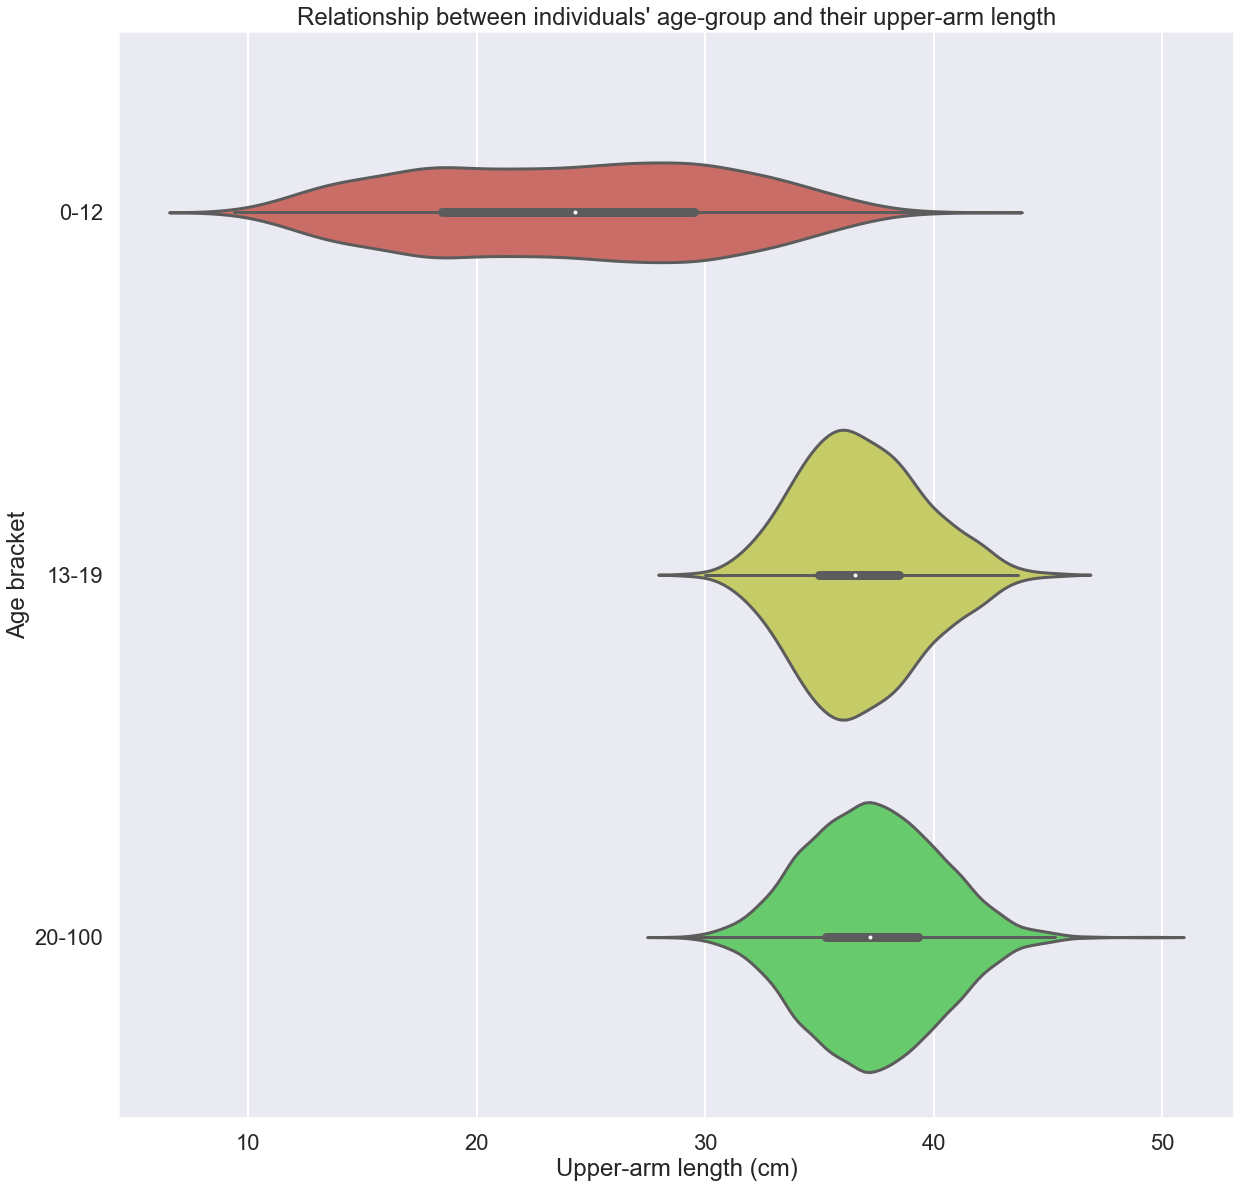

In [25]:
sns.set_theme()
sns.set_palette("hls")
sns.set_context("poster")
ax = sns.violinplot(data=nhanes, x="bmxarml", y="agebkt")
# Essential documentation: https://archive.ph/QoRNq. 
ax.set_xlabel("Upper-arm length (cm)")
ax.set_ylabel("Age bracket")
ax.set_title("Relationship between individuals' age-group and their upper-arm length")
plt.savefig("testing.png", dpi=300)
plt.rcParams['figure.figsize']=(20,20)

In [32]:
import os 
os.path.expanduser("~/desktop/soc360fa22")

'/Users/gjmb/desktop/soc360fa22'

Text(0.5, 0, 'Upper-arm length (cm)')

Text(0, 0.5, 'Sex')

([<matplotlib.axis.YTick at 0x15de6d3a0>,
 [Text(0, 0, 'male'), Text(0, 1, 'female')])

Text(0.5, 1.0, 'Relationship between biological sex and their upper-arm length')

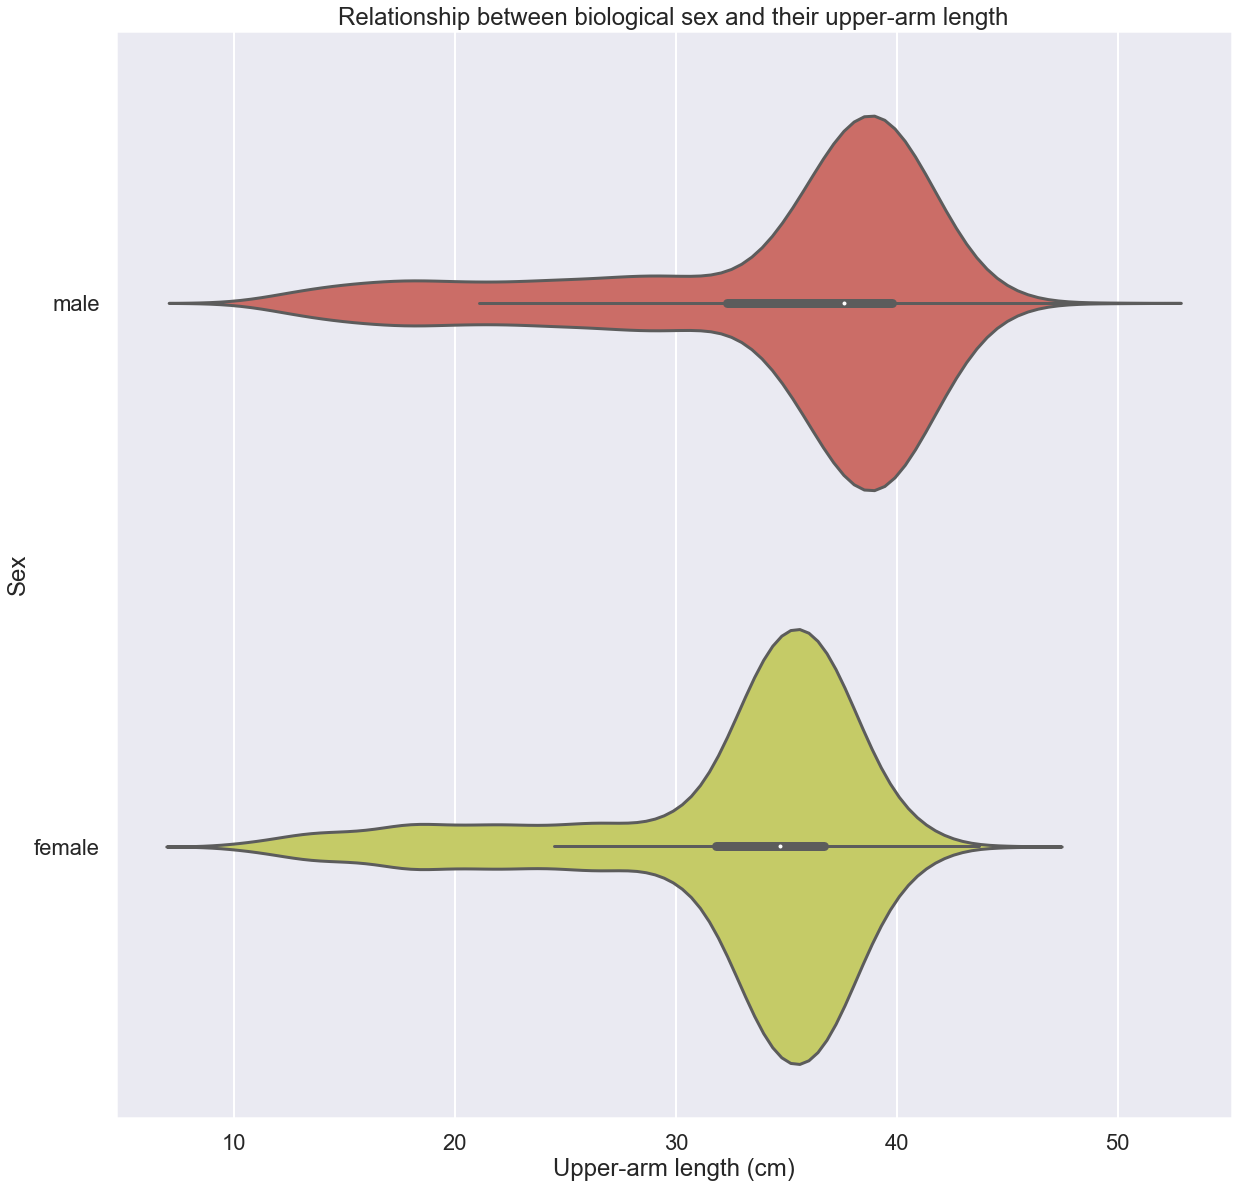

In [36]:
sns.set_palette("hls")
sns.set_context("poster")
ax = sns.violinplot(data=nhanes, x="bmxarml", y="riagendr", orient="h")
# Essential documentation: https://archive.ph/QoRNq. 
ax.set_xlabel("Upper-arm length (cm)")
ax.set_ylabel("Sex")
plt.yticks([0, 1], ['male', 'female'])
ax.set_title("Relationship between biological sex and their upper-arm length")
plt.savefig("img/bmxarml.png", dpi=300)
plt.rcParams['figure.figsize']=(20,20)